# Leaky Integrate and Fire Neuron (LIF)


## Introduction

In this notebook we will work with one of the most widely used models for spiking neurons: the Leaky Integrate and Fire neural model. In the LIF equations, only the subthreshold behavior of the membrane is explicitely modeled (capacitance and leak resistance):   

\begin{equation} C_{m}\frac{dV}{dt} = - g_{L}(V-E_{leak}) + I_{inj} \end{equation}

remember that $C_{m} = \tau_{m} / R_{m}$  and  $g_{L} = 1 / R_{m}$

\begin{equation} \tau_{m}\frac{dV}{dt} = - (V-E_{leak}) + I_{inj} R_{m} \end{equation}

To model the spike generation, we simply assume the neuron has a "threshold" $V_{th}$. If the membrane potential $V$ crosses such threshold, $V$ is then reset to $V_{reset}$ (~ at resting potential), meaning that a spike has been fired. 

\begin{equation} V(t) >= V_{th} \ \ then \ \ V(t+\Delta) = V_{reset} \end{equation}
 
This model is very popular among computacional neuroscientists due to its simplicity and tractability. 

#  Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Asign constants

In [2]:
# Asign constants

dt = 0.0002 #simulation time step
V_reset = -0.080 # -80mV, reset potential after a spike
E_l = -0.075 # -75mV #this would be equal to Vm, the resting membrane potential
V_th = -0.040 # -40mV spike threshold
Rm = 10e6 # membrane resistance
tau_m = 10e-3 # membrane time constant in sec

Iinj0 = 5e-10 #external current. #Increase to 5e-9 for spiking!

Initialize variables

In [3]:
### Initialize variables

T = np.arange(0,0.3,dt) # 300 ms simulation
Vm = np.zeros(T.size)
Vm[0] = E_l #Initialize the voltage, this would be equal to Vm
Vm[1] = E_l
Iinj = np.zeros(T.size) #external injected current
Iinj[round(T.size/5):round(T.size/1.3)] = Iinj0  

Run the simulation

In [4]:
#Simulation 

for t in range(1,T.size-1):
    if Vm[t] > V_th : #If the membrane potential crosses threshold the neuron spikes!
        Vm[t] = 0
        Vm[t+1] = V_reset
    else : #Equation: tau dV/dt = -(Vm - El) + Iinj Rm  
        Vm[t+1] = Vm[t] + dt * ( -(Vm[t] - E_l) + Iinj[t] * Rm) / tau_m 
        #Check for Euler implementation to see how one solves numerically (in a simulation) a differential equation


Plot the results

Text(0, 0.5, 'Voltage (mV)')

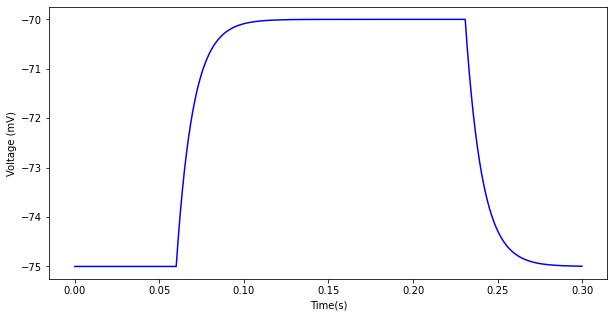

In [5]:
#Plotting

plt.figure(figsize=(10,5))
plt.plot(T,Vm*1000,'b-')
plt.xlabel('Time(s)')
plt.ylabel('Voltage (mV)')
#plt.ylim([-80, 5])

## EXERCISE 1 

What happens if you increase the injected current? what happens when you change the membrane time constant? and the threshold? 

# IAF with noise

We will now look how the neural model behaves in the non ideal, but biologically realistic scenario when there is some noise injected to the neuron. 

Asign constants

In [6]:
# Asign constants

V_reset = -0.080 # -80mV
E_l = -0.075 # -75mV
V_th = -0.040 # -40mV
Rm = 10e6 # membrane resistance
tau_m = 10e-3 # membrane time constant

Initialize variables

In [7]:
### Initialize variables

dt = 0.0002 
T = np.arange(0,0.3,dt) # 300 ms simulation
Vm = np.zeros(T.size)
Vm[0] = E_l
Vm[1] = E_l
Iinj = 5e-9
Iinj = np.random.randn(T.size)*5e-9 + 3e-9 #introduce noise into the injected current

Run the simulation 

In [8]:
#Simulation 

for t in range(1,T.size-1):
    if Vm[t] > V_th :
        Vm[t] = 0
        Vm[t+1] = V_reset
    else :  #Equation tau dV/dt = (Vm - El) + Iinj Rm  
        Vm[t+1] = Vm[t] + dt * ( -(Vm[t] - E_l) + Iinj[t] * Rm) / tau_m 
        #Check for Euler implementation to see how one solves numerically (in a simulation) a differential equation


Plot the results (that looks more like a real neuron right?)

Text(0, 0.5, 'Voltage (mV)')

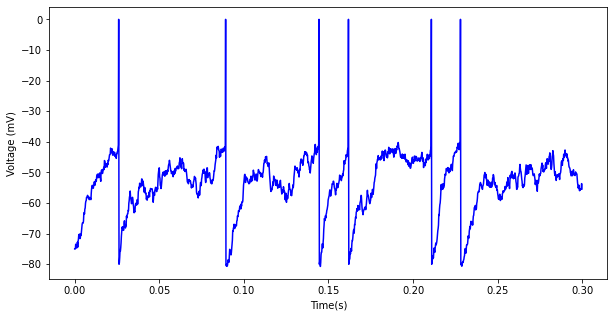

In [9]:
#Plotting

plt.figure(figsize=(10,5))
plt.plot(T,Vm*1000,'b-')
plt.xlabel('Time(s)')
plt.ylabel('Voltage (mV)')

## EXERCISE 2

Imagine you are a physiologist (like Tom Tagoe). Calculate an 'FI" courve for the integrate and fire model!
HINT: you should "inject" increasing values of current to the neural model and plot how the firing rate / spike count of the neuron relates to the amount of injected current. 

